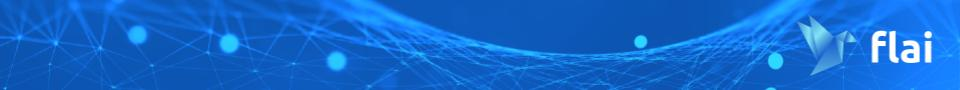

# **Análise do German Credit Data**
  
https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


---
## **Importação dos Dados**

In [13]:
# importação dos dados direto do site da UCI
import pandas as pd

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

dados = pd.read_csv(url, delimiter = ' ', header = None)  
dados.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


---
## **Pré-processamento Inicial**

In [14]:
# renomeando colunas
nomes = ['conta', 'duração', 'historico', 'motivo', 'quantia', 
         'poupança', 'emprego', 'taxa', 'status', 'garantia', 
         'residencia', 'propriedades', 'idade', 'financiamentos', 'moradia', 
         'creditos', 'trabalho', 'dependentes', 'telefone', 'estrangeiro', 'pagador']
         
dados.columns = nomes
dados.head()

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,residencia,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [15]:
#Pré-processamento inicial das variáveis

dic = {'A11': 'negativo', 'A12': '[0-200)', 'A13': '200+', 'A14': 'sem conta'}
dados['conta'] = dados['conta'].map(dic)


dic = {'A30': 'primeira vez', 'A31': 'creditos quitados', 'A32': 'pagamento em dia', 
       'A33': 'já atrasou pagamentos', 'A34': 'conta crítica'}
dados['historico'] = dados['historico'].map(dic)


dic = {'A40': 'carro novo', 'A41': 'carro usado', 'A42': 'móveis', 
       'A43': 'radio/televisão', 'A44': 'itens de casa', 'A45': 'reparos', 
       'A46': 'educação', 'A47': 'férias', 'A48': 'retreinamentos', 
       'A49': 'negócios', 'A410': 'outros'}
dados['motivo'] = dados['motivo'].map(dic)


dic = {'A61': '<100', 'A62': '[100-500)', 'A63': '[500-1000)',
       'A64': '>1000', 'A65': 'sem conta'}
dados['poupança'] = dados['poupança'].map(dic)


dic = {'A71': 'desempregado', 'A72': '< 1 ano', 'A73': '[1,4) anos',
       'A74': '[4,7) anos', 'A75': '> 7 anos'}
dados['emprego'] = dados['emprego'].map(dic)


dic = {'A91': 'masculino/divorciado', 'A92': 'feminino/divorciado',
       'A93': 'masculino/solteiro', 'A94': 'masculino/casado'}
dados['status'] = dados['status'].map(dic)


dic = {'A101': 'nenhum', 'A102': 'co-aplicante', 'A103': 'fiador'}
dados['garantia'] = dados['garantia'].map(dic)

 
dic = {'A121': 'imobiliario', 'A122': 'seguro  de vida',
       'A123': 'carro', 'A124': 'sem propriedades'}
dados['propriedades'] = dados['propriedades'].map(dic)


dic = {'A141': 'bancos', 'A142': 'lojas', 'A143': 'nenhum'}
dados['financiamentos'] = dados['financiamentos'].map(dic)


dic = {'A151': 'alugada', 'A152': 'própria', 'A153': 'de graça'}
dados['moradia'] = dados['moradia'].map(dic)


dic = {'A171': 'desempregado', 'A172': 'nível 1', 'A173': 'nível 2', 'A174': 'nível 3'}
dados['trabalho'] = dados['trabalho'].map(dic)


dic = {'A191': 'não', 'A192': 'sim'}
dados['telefone'] = dados['telefone'].map(dic)


dic = {'A201': 'não', 'A202': 'sim'}
dados['estrangeiro'] = dados['estrangeiro'].map(dic)


dic = {1: 'bom', 2: 'mau'}
dados['pagador'] = dados['pagador'].map(dic)

dados.head()

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,residencia,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
0,negativo,6,conta crítica,radio/televisão,1169,sem conta,> 7 anos,4,masculino/solteiro,nenhum,4,imobiliario,67,nenhum,própria,2,nível 2,1,sim,não,bom
1,[0-200),48,pagamento em dia,radio/televisão,5951,<100,"[1,4) anos",2,feminino/divorciado,nenhum,2,imobiliario,22,nenhum,própria,1,nível 2,1,não,não,mau
2,sem conta,12,conta crítica,educação,2096,<100,"[4,7) anos",2,masculino/solteiro,nenhum,3,imobiliario,49,nenhum,própria,1,nível 1,2,não,não,bom
3,negativo,42,pagamento em dia,móveis,7882,<100,"[4,7) anos",2,masculino/solteiro,fiador,4,seguro de vida,45,nenhum,de graça,1,nível 2,2,não,não,bom
4,negativo,24,já atrasou pagamentos,carro novo,4870,<100,"[1,4) anos",3,masculino/solteiro,nenhum,4,sem propriedades,53,nenhum,de graça,2,nível 2,2,não,não,mau


In [16]:
dados.describe()

,duração,quantia,taxa,residencia,idade,creditos,dependentes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [17]:
dados.to_csv('german_processado_traduzido.csv', index = False)

---
## **Análise Exploratória dos Dados**

In [ ]:
# instalando biblioteca de visualização

!pip install sweetviz 

In [18]:
import sweetviz as sv

In [ ]:
dados['pagador'] = dados['pagador'].map({'bom': 0, 'mau': 1})

eda = sv.analyze(source = dados, target_feat = 'pagador')
eda.show_notebook()

---
## **Pré-processamento para Machine Learning**

In [20]:
!pip install pycaret 

     |████████████████████████████████| 266kB 4.2MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 276kB 33.2MB/s 
     |████████████████████████████████| 2.0MB 34.7MB/s 
     |████████████████████████████████| 14.2MB 215kB/s 
     |████████████████████████████████| 174kB 54.7MB/s 
     |████████████████████████████████| 6.8MB 29.3MB/s 
     |████████████████████████████████| 1.4MB 25.0MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 112kB 53.0MB/s 
     |████████████████████████████████| 256kB 51.2MB/s 
     |████████████████████████████████| 1.7MB 13.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 174kB 43.8MB/s 
     |████████████████████████████████| 1.1MB 25.2MB/s 
     |████████████████████████████████| 61kB 6.4MB/s

---
## **Machine Learning com PyCaret**

In [21]:
from pycaret.classification import setup, models, create_model, compare_models, tune_model, predict_model, plot_model, predict_model, evaluate_model, finalize_model, save_model

In [22]:
# Help da função Setup
?setup

In [23]:
# Configuração da Modelagem automática feita pelo PyCaret
# Envolve os procedimentos de validação quanto de pré-processamento
modelagem = setup(data = dados,
                  target = 'pagador',
                  train_size = 0.75,
                  normalize = True,
                  ignore_low_variance = True,
                  combine_rare_levels = True,
                  remove_multicollinearity = True,
                  feature_selection = True,
                  fold_strategy = 'stratifiedkfold',
                  fold = 10) 

,Description,Value
0,session_id,5825
1,Target,pagador
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1000, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
# Modelos disponiveis
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [25]:
# Analise do modelo Random Forest (Florest Aleatória)
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7733,0.8248,0.3913,0.7500,0.5143,0.3849,0.4196
1,0.8133,0.8344,0.4783,0.8462,0.6111,0.5005,0.5357
2,0.7467,0.7667,0.3478,0.6667,0.4571,0.3126,0.3407
3,0.7867,0.8006,0.3913,0.8182,0.5294,0.4129,0.4599
4,0.7200,0.7217,0.3182,0.5385,0.4000,0.2328,0.2465
5,0.6933,0.7050,0.3182,0.4667,0.3784,0.1844,0.1904
6,0.7867,0.7637,0.4091,0.7500,0.5294,0.4065,0.4378
7,0.7600,0.7303,0.2727,0.7500,0.4000,0.2887,0.3466
8,0.7200,0.8178,0.2273,0.5556,0.3226,0.1835,0.2127
9,0.7733,0.8353,0.3636,0.7273,0.4848,0.3596,0.3951


In [26]:
# Comparação dentre os modelos do PyCaret
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7613,0.7800,0.4951,0.6284,0.5527,0.3932,0.3990,0.024
rf,Random Forest Classifier,0.7573,0.7800,0.3518,0.6869,0.4627,0.3267,0.3585,0.514
lr,Logistic Regression,0.7560,0.7840,0.4682,0.6210,0.5305,0.3711,0.3794,0.038
ridge,Ridge Classifier,0.7560,0.0000,0.4460,0.6306,0.5204,0.3637,0.3744,0.018
et,Extra Trees Classifier,0.7547,0.7595,0.3875,0.6538,0.4814,0.3356,0.3577,0.492
lightgbm,Light Gradient Boosting Machine,0.7467,0.7774,0.4547,0.5997,0.5156,0.3489,0.3559,0.114
gbc,Gradient Boosting Classifier,0.7440,0.7800,0.4453,0.5980,0.5073,0.3399,0.3484,0.167
ada,Ada Boost Classifier,0.7427,0.7547,0.4769,0.5950,0.5243,0.3513,0.3586,0.125
nb,Naive Bayes,0.7400,0.7545,0.6379,0.5560,0.5928,0.4032,0.4064,0.018
knn,K Neighbors Classifier,0.7227,0.6823,0.3302,0.5582,0.4112,0.2473,0.2630,0.118


In [27]:
# Tunagem dos Hiperparâmetros da Floresta 
rf_tunada = tune_model(rf, optimize = 'F1', n_iter = 15)
rf_tunada

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7333,0.8294,0.8696,0.5405,0.6667,0.4639,0.5005
1,0.7067,0.7968,0.6957,0.5161,0.5926,0.3712,0.3813
2,0.7067,0.7851,0.7826,0.5143,0.6207,0.3978,0.4212
3,0.7600,0.8411,0.6522,0.6000,0.6250,0.4490,0.4498
4,0.6800,0.7547,0.6818,0.4688,0.5556,0.3187,0.3324
5,0.6800,0.7307,0.5909,0.4643,0.5200,0.2851,0.2898
6,0.7067,0.7633,0.6364,0.5000,0.5600,0.3447,0.3504
7,0.6400,0.7093,0.6364,0.4242,0.5091,0.2424,0.2549
8,0.7333,0.7967,0.7727,0.5312,0.6296,0.4322,0.4508
9,0.7733,0.8345,0.8182,0.5806,0.6792,0.5117,0.5297


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=5825, verbose=0,
                       warm_start=False)

In [28]:
# Estimativa do Erro de Generalização do Modelo Final
pred = predict_model(rf_tunada)
pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.696,0.7786,0.6974,0.5,0.5824,0.3535,0.3656


,historico_conta crítica,residencia_3,moradia_alugada,moradia_de graça,taxa_3,status_masculino/casado,propriedades_sem propriedades,historico_primeira vez,conta_200+,propriedades_carro,historico_creditos quitados,propriedades_imobiliario,emprego_47) anos,motivo_carro usado,financiamentos_lojas,emprego_< 1 ano,motivo_carro novo,poupança_500-1000),garantia_co-aplicante,garantia_fiador,motivo_radio/televisão,moradia_própria,conta_negativo,poupança_<100,emprego_14) anos,creditos_1,residencia_2,poupança_>1000,motivo_móveis,poupança_sem conta,trabalho_nível 1,financiamentos_nenhum,historico_pagamento em dia,taxa_2,residencia_4,conta_sem conta,residencia_1,status_masculino/divorciado,emprego_> 7 anos,trabalho_nível 2,idade,motivo_negócios,status_feminino/divorciado,quantia,financiamentos_bancos,trabalho_desempregado,trabalho_nível 3,taxa_1,duração,conta_0-200),creditos_3,emprego_desempregado,taxa_4,motivo_educação,historico_já atrasou pagamentos,poupança_100-500),status_masculino/solteiro,motivo_itens de casa,telefone_não,propriedades_seguro de vida,dependentes_1,pagador,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.740069,0.0,0.0,1.905421,0.0,0.0,0.0,0.0,0.521059,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0.6549
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.999360,0.0,0.0,1.807141,0.0,0.0,0.0,0.0,1.280702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1,0.5622
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.740069,0.0,0.0,-0.142568,0.0,0.0,0.0,0.0,1.280702,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,0.5408
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.044297,0.0,0.0,0.408936,0.0,0.0,0.0,0.0,-0.238584,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1,0.5903
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.825761,0.0,0.0,1.250687,0.0,0.0,0.0,0.0,-0.238584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,0,0.6651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.129645,0.0,0.0,0.140255,0.0,0.0,0.0,1.0,1.280702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0.5556
246,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.566126,0.0,0.0,2.865251,1.0,0.0,1.0,0.0,0.267844,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0.5609
247,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.044297,0.0,0.0,-0.175093,1.0,0.0,0.0,0.0,-0.491799,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.6003
248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.392183,0.0,0.0,-0.658719,0.0,0.0,0.0,0.0,-0.491799,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.6937


In [29]:
# Tornando a variável 'Label' em probabilidades da Classe 1 e calculo de seus quartis
aux1 = 1 - pred[pred['Label'] == 0][['Score']] 
aux2 = pred[pred['Label'] == 1][['Score']] 
probs = pd.concat([aux1, aux2]).sort_index() 
probs.quantile([0.25, 0.5, 0.75]).round(2)

,Score
0.25,0.34
0.50,0.47
0.75,0.55


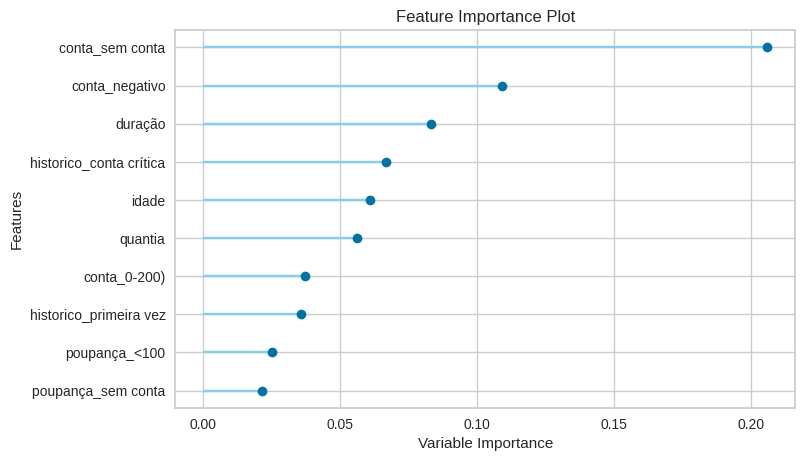

In [30]:
# Importância das Variáveis
plot_model(rf_tunada, plot = 'feature')

In [31]:
# Gráficos
evaluate_model(rf_tunada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
# Finalizar o modelo: retreinar o modelo final utilizando todos os dados disponíveis
modelo_final = finalize_model(rf_tunada)

In [ ]:
# Salvar o modelo para uso posterior
save_model(modelo_final, 'modelo-german-credit-data')

---
## **Deploy do Modelo Final**


- Aplicativo Streamlit na pasta Dia 3 dos arquivos da imersão

---
## **Datasets para novos desafios**


- https://www.kaggle.com/rikdifos/credit-card-approval-prediction
- https://www.kaggle.com/atulmittal199174/credit-risk-analysis-for-extending-bank-loans
- https://www.kaggle.com/ashydv/leads-dataset?select=Leads.csv
- https://www.kaggle.com/brycecf/give-me-some-credit-dataset